# Research of real-estate advertisements

At your disposal is the data of the Yandex Real Estate service - an archive of ads for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. Your job is to set the parameters. This will allow to build an automated system: it will track anomalies and fraudulent activity.

Two types of data are available for each apartment for sale. The first ones are entered by the user, the second ones are obtained automatically on the basis of cartographic data. For example, the distance to the center, airport, nearest park and reservoir.

## Researching data from a file

To begin with, we import all the necessary libraries and display the first five rows of the table:

In [1]:
import pandas as pd # pandas library import
import matplotlib.pyplot as plt # import matplotlib library
import numpy as np # numpy library import

In [2]:
df = pd.read_csv('/datasets/real_estate_data.csv') # reading data file and saving to df
df.head() # getting first 5 rows of df table

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...


The data in the table is stuck together in one line, which makes it difficult to work with it. Let's specify a tab character as a separator and again display the first five lines of the table.

In [3]:
pd.set_option('display.max_columns', None) # setting the display of all columns on the screen
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t') # reading data file, 
# specifying a tab character as a separator and saving to df
df.head() # getting first 5 rows of df table

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Get general information about the table.

In [4]:
df.info() # getting general information about data in df table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

The table has twenty-two columns. The data types in the columns are different - float64, int64, object, bool.

According to the data documentation:

* `total_images` - the number of photos of the apartment in the ad;
* `last_price` - price at the time of removal from publication;
* `total_area` - area of the apartment in square meters (in square meters);
* `first_day_exposition` — publication date;
* `rooms` - number of rooms;
* `ceiling_height` - ceiling height in meters (in meters);
* `floors_total` - total floors in the house;
* `living_area` - living area in square meters (in square meters);
* `floor` - floor;
* `is_apartment` - apartments (boolean type);
* `studio` — studio apartment (boolean type);
* `open_plan` - free planning (boolean type);
* `kitchen_area` - kitchen area in square meters (in square meters);
* `balcony` — number of balconies;
* `locality_name` - the name of the locality;
* `airports_nearest` — distance to the nearest airport in meters (in meters);
* `cityCenters_nearest` - distance to the city center in meters (in meters);
* `parks_around3000` - number of parks within a 3 km radius;
* `parks_nearest` - distance to the nearest park in meters (in meters);
* `ponds_around3000` - the number of reservoirs within a radius of 3 km;
* `ponds_nearest` - distance to the nearest body of water in meters (in meters);
* `days_exposition` - how many days the ad was placed (from publication to removal).

### Conclusion

Each row of the table contains data on the advertisements for the sale of apartments. Some of the columns describe the physical data of the apartment: area of the apartment, number of rooms, floor, number of balconies, ceiling height, number of floors in the house, kitchen area, layout data. The rest of the data is more related to the sale: the cost of the apartment, the date the ad was published, how many days the ad was posted, the locality, the distance to the airport / city center, the number of parks / water bodies within a radius of 3 km, the distance to the nearest park / water body, the number of photos of the apartment in ad.

Based on preliminary analysis, it can be argued that there are incorrect data and there are gaps in the data.

The above problems need to be fixed.

## Data preprocessing

First, let's rename some columns so that the table is displayed in a nice style.

In [5]:
df = df.rename(columns={'cityCenters_nearest': 'city_center_nearest', 'studio': 'is_studio', 
                        'open_plan': 'is_open_plan', 'parks_around3000': 'parks_around_3km', 
                        'ponds_around3000': 'ponds_around_3km'}) # renaming columns
df.columns # check

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'is_studio', 'is_open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around_3km', 'parks_nearest', 'ponds_around_3km',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Fill in missing values and check data for anomalies

Let's determine the number of missing values in the table.

In [6]:
df.isna().sum() # missing values count

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
is_studio                   0
is_open_plan                0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_center_nearest      5519
parks_around_3km         5518
parks_nearest           15620
ponds_around_3km         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Let's go in order, there are 9195 gaps in the `ceiling_height` column. This can be explained by the fact that when filling out the table, the user could simply not know or not remember the height of the ceiling in the apartment. You can populate this data with the median height for apartments located in buildings with the same number of floors. The logic of this decision lies in the fact that typical houses (series of houses) are widespread in our country. Therefore, gaps in the `floors_total` column will have to be handled. Users most often do not indicate the number of floors in the house when the apartment is on the top floor. Let us determine the share of these gaps.

In [7]:
print('The proportion of missing values in the column \'floor\' is:', 
      round((df['floors_total'].isna().sum() / len(df['floors_total'])) * 100, 2), '%')

The proportion of missing values in the column 'floor' is: 0.36 %


Given the proportion of missing values in the `floors_total` column, you can replace them with values from the `floor` column.

In [8]:
df.loc[df['floors_total'].isna(), 'floors_total'] = df.loc[df['floors_total'].isna(), 'floor'] # change of missing values
df['floors_total'].isna().sum() # check

0

Additionally, we check the `floors_total` column in order to identify possible anomalies.

In [9]:
df['floors_total'].describe() # display of characteristic distribution values

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

There are no negative and too large values in the sample, we conclude that the data in the `floors_total` column is in order.

Now we can move on to work on the gaps in the `ceiling_height` column. Let's check the characteristic data values in the sample.

In [10]:
df['ceiling_height'].describe() # display of characteristic distribution values

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

There are abnormally large values in the data distribution, let's build a histogram based on the data slice from 5 to 100 meters. Five meters in this case is seen as the highest possible ceiling height in the apartment.

<AxesSubplot:>

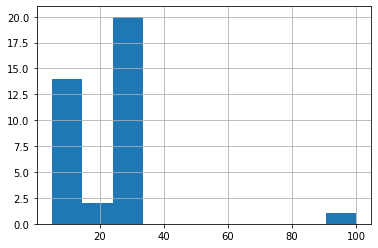

In [11]:
df['ceiling_height'].hist(range=(5, 100)) # building a histogram of abnormally large ceiling heights

We will form an auxiliary table with data where the ceiling height in the apartment is more than 5 meters in order to study the anomalies that have arisen in more detail and find out their origin.

In [12]:
df.query('ceiling_height >= 5') # building a slice with information on apartments 
# where the ceiling is higher or equal to 5 meters

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
355,17,3600000.0,55.2,2018-07-12T00:00:00,2,25.0,5.0,32.0,2,False,False,False,NaN,2.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,259.0
464,15,66571000.0,280.3,2015-06-11T00:00:00,6,5.2,8.0,159.5,7,NaN,False,False,21.1,0.0,Санкт-Петербург,26316.0,6655.0,3.0,187.0,1.0,616.0,578.0
1026,20,155000000.0,310.0,2018-10-12T00:00:00,5,5.3,3.0,190.0,3,NaN,False,False,63.0,2.0,Санкт-Петербург,24899.0,4785.0,0.0,NaN,1.0,603.0,NaN
1053,13,550000.0,29.0,2018-02-01T00:00:00,1,5.0,3.0,NaN,1,False,False,False,NaN,NaN,Бокситогорск,NaN,NaN,NaN,NaN,NaN,NaN,6.0
1388,20,59800000.0,399.0,2015-01-21T00:00:00,5,5.6,6.0,NaN,6,NaN,False,False,NaN,0.0,Санкт-Петербург,26204.0,6934.0,2.0,149.0,2.0,577.0,719.0
3148,14,2900000.0,75.0,2018-11-12T00:00:00,3,32.0,3.0,53.0,2,NaN,False,False,8.0,NaN,Волхов,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3474,3,1400000.0,30.0,2018-03-16T00:00:00,1,8.0,5.0,15.3,2,False,False,False,7.3,NaN,деревня Нурма,NaN,NaN,NaN,NaN,NaN,NaN,125.0
4643,0,4300000.0,45.0,2018-02-01T00:00:00,2,25.0,9.0,30.0,2,NaN,False,False,7.0,1.0,Санкт-Петербург,12016.0,13256.0,1.0,658.0,1.0,331.0,181.0
4876,7,3000000.0,25.0,2017-09-27T00:00:00,0,27.0,25.0,17.0,17,NaN,False,True,NaN,2.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0


The preliminary analysis shows that three groups of anomalies can be distinguished. I propose to leave the first group with heights from 5 m to 8.3 m unchanged, since there are single projects with very large ceilings. In the second group, with height values from 25 (2.5 m. according to building codes, the minimum ceiling height of a residential building) to 32 m, most likely an error during filling, here you can correct it by dividing the height value by 10.

In [13]:
df.loc[(df['ceiling_height'] >= 25) & (df['ceiling_height'] <= 32),
       'ceiling_height'] = df['ceiling_height'] / 10 # correction of abnormal values
df.query('ceiling_height > 8.3') # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
5076,0,3850000.0,30.5,2018-10-03T00:00:00,1,24.0,5.0,19.5,1,True,False,False,5.5,NaN,Санкт-Петербург,29686.0,8389.0,3.0,397.0,1.0,578.0,7.0
15061,19,5600000.0,56.4,2018-05-11T00:00:00,2,14.0,14.0,32.4,5,NaN,False,False,9.1,2.0,Санкт-Петербург,14814.0,13610.0,0.0,NaN,0.0,NaN,315.0
17496,15,6700000.0,92.9,2019-02-19T00:00:00,3,20.0,17.0,53.2,14,NaN,False,False,12.0,5.0,Санкт-Петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,NaN
20507,12,5950000.0,60.0,2018-02-19T00:00:00,2,22.6,14.0,35.0,11,NaN,False,False,13.0,1.0,Санкт-Петербург,27028.0,12570.0,0.0,NaN,0.0,NaN,40.0
22309,20,5300000.0,45.0,2017-09-30T00:00:00,1,10.3,16.0,15.5,15,NaN,False,False,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22869,0,15000000.0,25.0,2018-07-25T00:00:00,1,100.0,5.0,14.0,5,True,False,False,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0


With the third group, where there are ceiling heights of 10.3, 14, 20, 22.6, 24, 100 m, the most difficult. From 100 m, I’ll assume that they mixed up the data for the height and the total area of ​​the apartment when filling in (25 sq.m. looks implausible), so here you can swap the values \u200b\u200bof the height and the total area divided by 10.

In [14]:
df.loc[df['ceiling_height'] == 100, 'ceiling_height'] = df['total_area'] / 10 # abnormal value correction
df.loc[22869, 'ceiling_height'] # check

2.5

Now you can proceed to the processing of gaps in the `ceiling_height` column, simultaneously processing the remaining apartments with abnormally high ceilings (more than 10 m). Omissions could have arisen due to the banal ignorance of this parameter by the user, but since this is a fairly typical value, it can be processed.

Let's take into account that often the ceiling height in an apartment depends on the number of floors in the house (a series of typical houses). Therefore, we will replace the gaps in the table with the median values ​​for the `floors_total` column. It should also be taken into account that in the original dataframe there are houses with a unique number of floors in a single quantity, it is possible that gaps in floor height are possible in such houses, and then replacing with a median value may not work. Therefore, we will use an auxiliary slice of the dataframe (houses with a unique number of floors greater than 1).

Let's output the number of buildings with unique numbers of floors.

In [15]:
df['floors_total'].value_counts() # displaying the number of buildings with unique floor qualities

5.0     5792
9.0     3766
16.0    1376
12.0    1368
4.0     1210
10.0    1177
25.0    1075
6.0      923
17.0     834
3.0      672
7.0      596
14.0     555
18.0     508
24.0     471
8.0      398
2.0      385
15.0     368
23.0     353
19.0     342
22.0     287
20.0     273
13.0     232
11.0     206
27.0     164
21.0     162
26.0     124
1.0       28
35.0      24
28.0      21
36.0       3
34.0       1
60.0       1
29.0       1
33.0       1
52.0       1
37.0       1
Name: floors_total, dtype: int64

For an auxiliary dataframe, we will take data on buildings, except for 29, 33, 34, 37, 52, 60 floors.

In [16]:
zf = df.query('floors_total != [29, 33, 34, 37, 52, 60]') # auxiliary query formation
for value in zf['floors_total'].unique(): # formation of a cycle by unique values of the number of floors
    median = df.loc[df['floors_total'] == value, 'ceiling_height'].median() # calculating median for column 'ceiling height'
    df.loc[(df['ceiling_height'].isna()) & (df['floors_total'] == value), 'ceiling_height'] = median # change of missing values
    df.loc[(df['ceiling_height'] > 10) & (df['floors_total'] == value), 'ceiling_height'] = median # change of missing values

In [17]:
df['ceiling_height'].isna().sum() # check

1

We have one gap left in the `ceiling_height` column. I propose to replace the gap with the median value for the entire sample.

In [18]:
df.loc[df['ceiling_height'].isna(), 'ceiling_height'] = df['ceiling_height'].median() # replacing a gap with a median value
df['ceiling_height'].isna().sum() # check

0

Let's start processing gaps in room areas, these are the `living_area` and `kitchen_area` columns. Several options are possible here. Usually, the values for the areas of the rooms are not written when the apartment has a free layout, or they write the value for only one of the rooms. Let's consider these options. It is worth remembering that we know the values ​​of the total area for all apartments.

First, let's check the data against the `total_area` column.

In [19]:
df['total_area'].describe() # validating data in `total_area` column

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

The data is in order, there are some large values, but apartments with an area of up to 900 sq.m. exist, it would be worth straining if the area values were significantly more than 1000 sq.m.

Also, for further actions, we need to rely on the values of the number of rooms in the apartment. Let's look at the unique values for the number of rooms.

In [20]:
df['rooms'].value_counts() # displaying the number of apartments with a unique value for the number of rooms

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

The source dataframe contains apartments with 0 rooms. This is possible provided that the apartment is a studio. Since we have no gaps in the `is_studio` column, we can check how many studios have 0 in the number of rooms.

In [21]:
df.loc[df['rooms'] == 0, 'is_studio'].value_counts() # displaying the number of studio apartments with 0 rooms

True     138
False     59
Name: is_studio, dtype: int64

There are 59 non-studio apartments in the dataframe, which have a number of rooms of 0. This is more like an incorrect filling in the table by the owner. Let's replace these values with 1.

In [22]:
df.loc[(df['rooms'] == 0) & (df['is_studio'] == False), 'rooms'] = 1 # abnormal value correction
print(df.loc[df['rooms'] == 0, 'is_studio'].value_counts()) # check
df['rooms'].value_counts() # check

True    138
Name: is_studio, dtype: int64


1     8106
2     7940
3     5814
4     1180
5      326
0      138
6      105
7       59
8       12
9        8
10       3
11       2
14       2
15       1
19       1
16       1
12       1
Name: rooms, dtype: int64

Let's take a look at the options.

* Option when the apartment does not have data on the areas of the kitchen and living room.

Here you can replace the gaps with the median values of the areas of the rooms, depending on their number. But first, let's determine how many missing values in the `kitchen_area_area` column are in studio apartments with 0 rooms.

In [23]:
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'kitchen_area'].isna().sum() # displaying the number of studio apartments
# with the number of rooms 0 with gaps in the values of the kitchen area

138

Since in studios, as a rule, there is no clear separation between the kitchen and the living area, we will assume that the area of the kitchen is equal to the living area. To do this, check the number of missing values in the `living_area` column in studio apartments with 0 rooms.

In [24]:
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'living_area'].isna().sum() # displaying the number of studio apartments 
# with the number of rooms 0 with gaps in the area of the living room 

10

There are only 10 such apartments, let's leave it as it is for now. We will process these values in subsequent stages, but for now we will carry out the planned replacement.

In [25]:
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 
       'kitchen_area'] = df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'living_area'] # change of missing values
df.loc[(df['is_studio'] == True) & (df['rooms'] == 0), 'kitchen_area'].isna().sum() # check

10

You can now replace gaps with median values based on the number of rooms.

In [26]:
for value in df['rooms'].unique(): # forming a cycle by unique values of the number of rooms
    median_1 = df.loc[(df['rooms'] == value), 'living_area'].median() # calculating median for column 'living_area'
    median_2 = df.loc[(df['rooms'] == value), 'kitchen_area'].median() # calculating median for column 'kitchen_area'
    df.loc[(df['living_area'].isna()) & (df['rooms'] == value), 'living_area'] = median_1 # change of missing values
    df.loc[(df['kitchen_area'].isna()) & (df['rooms'] == value), 'kitchen_area'] = median_2 # change of missing values

In [27]:
print('The number of missing values in the \'living_area\' column is:', df['living_area'].isna().sum()) # check
print('The number of missing values in the \'kitchen_area\' column is:', df['kitchen_area'].isna().sum()) # check

The number of missing values in the 'living_area' column is: 0
The number of missing values in the 'kitchen_area' column is: 0


Let's move on to handling missing values in the `is_apartment` column. Let's display the unique values of this column.

In [28]:
df['is_apartment'].value_counts() # display unique values of 'is_apartment' column

False    2725
True       50
Name: is_apartment, dtype: int64

As we can see, apartment data is provided for a small number of objects. This may be due to the fact that when filling in the table, these data were entered automatically, and when displaying general information on the table, these values are written with the incorrect type 'object' instead of 'bool'. Let's leave these gaps unchanged for now.

Let's start handling missing values in the `balcony` column. Let's display the unique values of this column.

In [29]:
df['balcony'].value_counts() # display unique values of 'balcony' column 

1.0    4195
0.0    3758
2.0    3659
5.0     304
4.0     183
3.0      81
Name: balcony, dtype: int64

Here, values are most likely missing where there are no balconies. It is logical to replace gaps with zeros.

In [30]:
df.loc[(df['balcony'].isna()), 'balcony'] = 0 # change of missing values
print('The number of missing values in the \'balcony\' column is:', df['balcony'].isna().sum()) # check

The number of missing values in the 'balcony' column is: 0


Let's move on to handling missing values in the `locality_name` column.
We have 49 missing values in the original dataframe by location. Most likely this could happen when importing data from third-party services. But we have the distances to the airport and to the nearest city center, this should be enough to fill in the missing values.

First, let's look at the lines where the values in the `locality_name`, `airports_nearest`, `city_center_nearest` columns are missing.

In [31]:
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'].isna()) & (df['airports_nearest'].isna())] # line output
# with missing values

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
2033,6,5398000.0,80.0,2017-05-30T00:00:00,3,3.00,4.0,42.6,2,NaN,False,False,18.60,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,34.0
14342,3,3611000.0,53.5,2017-04-27T00:00:00,1,3.00,4.0,25.8,3,False,False,False,9.04,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92.0
17535,2,5985000.0,79.8,2018-07-30T00:00:00,3,2.55,9.0,45.0,2,False,False,False,9.50,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,213.0
20382,8,1750000.0,72.9,2018-10-27T00:00:00,3,2.55,5.0,47.3,2,NaN,False,False,8.30,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20590,7,3380000.0,56.0,2017-11-06T00:00:00,2,2.70,4.0,29.0,3,NaN,False,False,10.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78.0
21715,2,6047550.0,80.1,2018-07-30T00:00:00,2,2.55,9.0,30.5,2,False,False,False,29.20,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.0
21898,2,5886750.0,83.5,2018-07-30T00:00:00,2,2.55,9.0,36.6,2,False,False,False,29.70,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,169.0
22717,9,3000000.0,35.0,2018-01-02T00:00:00,1,2.60,16.0,16.0,7,False,False,False,10.00,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.0


These rows also lack the rest of the location data. There are only 8 of them, they will not greatly affect the analysis of the data. Let's remove these lines.

In [32]:
df = df.dropna(how='all', subset=['locality_name', 'airports_nearest',
                                  'city_center_nearest']).reset_index(drop=True) # deleting rows with index reassignment
df.info() # check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23691 non-null  int64  
 1   last_price            23691 non-null  float64
 2   total_area            23691 non-null  float64
 3   first_day_exposition  23691 non-null  object 
 4   rooms                 23691 non-null  int64  
 5   ceiling_height        23691 non-null  float64
 6   floors_total          23691 non-null  float64
 7   living_area           23691 non-null  float64
 8   floor                 23691 non-null  int64  
 9   is_apartment          2770 non-null   object 
 10  is_studio             23691 non-null  bool   
 11  is_open_plan          23691 non-null  bool   
 12  kitchen_area          23691 non-null  float64
 13  balcony               23691 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Let's group the data in the table with the missing location by distances to the nearest city center.

In [33]:
df.loc[df['locality_name'].isna()].groupby('city_center_nearest').agg({'city_center_nearest':'count'}) # grouping by distance
# to the nearest city center

,city_center_nearest
city_center_nearest,
1322.0,1
1780.0,1
3039.0,1
3312.0,1
3801.0,1
3902.0,1
4065.0,1
4069.0,1
4258.0,2


We group the obtained values into groups with a step of 500 - 2500 m according to the following principle:

* 0–2000 — 'A';
* 3000–5500 — 'B';
* 8000–10000 — 'C';
* 10500–12500 — 'D';
* 16500-17500 — 'E';
* 23500-24000 — 'F';
* 31500-32000 — 'G';
* 41000-41500 — 'H';
* for others — 'I'.

First, let's create a function.

In [34]:
def distance_group(distance): # returns the corresponding distance group
    if distance <= 3000:
        return 'A'
    if distance >= 3000 and distance <= 5500:
        return 'B'
    if distance >= 8000 and distance <= 10000:
        return 'C'
    if distance >= 10500 and distance <= 12500:
        return 'D'
    if distance >= 16500 and distance <= 17500:
        return 'E'
    if distance >= 23500 and distance <= 24000:
        return 'F'
    if distance >= 31500 and distance <= 32000:
        return 'G'
    if distance >= 41000 and distance <= 41500:
        return 'H'
    return 'I'

Let's create a new column `distance_category`.

In [35]:
df['distance_category'] = df['city_center_nearest'].apply(distance_group) # creating a new column
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,distance_category
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,I
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,I
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,I
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,NaN,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,I
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,C


Let's check the resulting groups for unique names of settlements.

In [36]:
df[df['distance_category'] == 'A']['locality_name'].unique() # checking group 'A' for unique place names

array(['Санкт-Петербург', nan], dtype=object)

In [37]:
df[df['distance_category'] == 'B']['locality_name'].unique() # checking group 'B' for unique place names

array(['Санкт-Петербург', nan], dtype=object)

In [38]:
df[df['distance_category'] == 'C']['locality_name'].unique() # checking group 'C' for unique place names

array(['Санкт-Петербург', nan], dtype=object)

In [39]:
df[df['distance_category'] == 'D']['locality_name'].unique() # checking group 'D' for unique place names

array(['Санкт-Петербург', nan], dtype=object)

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * Санкт-Петербург - St. Petersburg
</div>

In groups A-D, you can safely replace the missing values with 'Санкт-Петербург' (St. Petersburg).

In [40]:
df[df['distance_category'] == 'E']['locality_name'].unique() # checking group 'E' for unique place names

array(['Санкт-Петербург', 'посёлок Шушары', nan], dtype=object)

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * посёлок Шушары - Shushary village
</div>

In addition to 'Санкт-Петербург' (St. Petersburg), a unique meaning 'посёлок Шушары' (Shushary village) appeared. We will display the minimum and maximum distance to the airport for this unique value and for the missing ones, this will allow us to more accurately locate the missing values.

In [41]:
ef = df[df['distance_category'] == 'E'] # form an auxiliary dataframe
print('missing values:', min(ef[ef['locality_name'].isna()]['airports_nearest']), 
      max(ef[ef['locality_name'].isna()]['airports_nearest']))
print('посёлок Шушары (Shushary village):', min(ef[ef['locality_name'] == 'посёлок Шушары']['airports_nearest']), 
      max(ef[ef['locality_name'] == 'посёлок Шушары']['airports_nearest']))

missing values: 21460.0 22041.0
посёлок Шушары (Shushary village): 11226.0 11858.0


In group E, you can also replace missing values with 'Санкт-Петербург' (St. Petersburg).

In [42]:
df[df['distance_category'] == 'F']['locality_name'].unique() # checking group 'F' for unique place names

array(['посёлок Парголово', 'Санкт-Петербург', 'посёлок Шушары',
       'посёлок Стрельна', nan], dtype=object)

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * посёлок Парголово - Pargolovo village
    * посёлок Стрельна - Strelna village
</div>

In addition to 'Санкт-Петербург' (St. Petersburg), there were also unique meanings 'посёлок Шушары' (Shushary village), 'посёлок Парголово' (Pargolovo village), 'посёлок Стрельна' (Strelna village). We will display the minimum and maximum distance to the airport for these unique values and for the missing ones, this will allow us to determine the location of the missing values more accurately.

In [43]:
ff = df[df['distance_category'] == 'F'] # form an auxiliary dataframe
print('missing values:', min(ff[ff['locality_name'].isna()]['airports_nearest']),
      max(ff[ff['locality_name'].isna()]['airports_nearest']))
print('посёлок Шушары (Shushary village):', min(ff[ff['locality_name'] == 'посёлок Шушары']['airports_nearest']),
      max(ff[ff['locality_name'] == 'посёлок Шушары']['airports_nearest']))
print('посёлок Парголово (Pargolovo village):', min(ff[ff['locality_name'] == 'посёлок Парголово']['airports_nearest']),
      max(ff[ff['locality_name'] == 'посёлок Парголово']['airports_nearest']))
print('посёлок Стрельна (Strelna village):', min(ff[ff['locality_name'] == 'посёлок Стрельна']['airports_nearest']),
      max(ff[ff['locality_name'] == 'посёлок Стрельна']['airports_nearest']))

missing values: 20234.0 20234.0
посёлок Шушары (Shushary village): 17766.0 18055.0
посёлок Парголово (Pargolovo village): 53696.0 54061.0
посёлок Стрельна (Strelna village): 26770.0 28612.0


In group F, you can also replace missing values with 'Санкт-Петербург' (St. Petersburg).

In [44]:
df[df['distance_category'] == 'G']['locality_name'].unique() # checking group 'G' for unique place names

array(['Павловск', 'Колпино', 'посёлок Шушары', 'Пушкин', 'Петергоф', nan,
       'посёлок Понтонный'], dtype=object)

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * Павловск - Pavlovsk
    * Колпино - Kolpino
    * Пушкин - Pushkin
    * Петергоф - Peterhof
    * посёлок Понтонный - Pontonnyi village
</div>

The unique meanings 'Пушкин' (Pushkin), 'Петергоф' (Peterhof), 'посёлок Шушары' (Shushary village), 'Павловск' (Pavlovsk), 'Колпино' (Kolpino), 'посёлок Понтонный' (Pontonnyi village) also appeared here. We will display the minimum and maximum distance to the airport for these unique values and for the missing ones, this will allow us to determine the location of the missing values more accurately.

In [45]:
gf = df[df['distance_category'] == 'G'] # form an auxiliary dataframe
print('missing values:', min(gf[gf['locality_name'].isna()]['airports_nearest']), 
      max(gf[gf['locality_name'].isna()]['airports_nearest']))
print('Пушкин (Pushkin):', min(gf[gf['locality_name'] == 'Пушкин']['airports_nearest']), 
      max(gf[gf['locality_name'] == 'Пушкин']['airports_nearest']))
print('Петергоф (Peterhof):', min(gf[gf['locality_name'] == 'Петергоф']['airports_nearest']), 
      max(gf[gf['locality_name'] == 'Петергоф']['airports_nearest']))
print('посёлок Шушары (Shushary village):', min(gf[gf['locality_name'] == 'посёлок Шушары']['airports_nearest']), 
      max(gf[gf['locality_name'] == 'посёлок Шушары']['airports_nearest']))
print('Павловск (Pavlovsk):', min(gf[gf['locality_name'] == 'Павловск']['airports_nearest']), 
      max(gf[gf['locality_name'] == 'Павловск']['airports_nearest']))
print('Колпино (Kolpino):', min(gf[gf['locality_name'] == 'Колпино']['airports_nearest']), 
      max(gf[gf['locality_name'] == 'Колпино']['airports_nearest']))
print('посёлок Понтонный (Pontonnyi village):', min(gf[gf['locality_name'] == 'посёлок Понтонный']['airports_nearest']),
      max(gf[gf['locality_name'] == 'посёлок Понтонный']['airports_nearest']))

missing values: 19659.0 19744.0
Пушкин (Pushkin): 16282.0 19760.0
Петергоф (Peterhof): 36382.0 36796.0
посёлок Шушары (Shushary village): 17472.0 26202.0
Павловск (Pavlovsk): 19380.0 19775.0
Колпино (Kolpino): 25724.0 26196.0
посёлок Понтонный (Pontonnyi village): 30087.0 30087.0


In group G, you can replace missing values with 'Пушкин' (Pushkin).

In [46]:
df[df['distance_category'] == 'H']['locality_name'].unique() # checking group 'H' for unique place names

array(['Красное Село', nan], dtype=object)

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * Красное Село - Krasnoe Selo
</div>

In group H, you can replace missing values with 'Красное Село' (Krasnoe Selo).

Let's start replacing missing values in the `locality_name` column.

In [47]:
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'] <= 24000), 'locality_name'] = 'Санкт-Петербург' # change
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'] >= 31500) & (df['city_center_nearest'] <= 32000),
       'locality_name'] = 'Пушкин' # change
df.loc[(df['locality_name'].isna()) & (df['city_center_nearest'] >= 41000), 'locality_name'] = 'Красное Село' # замена
df['locality_name'].isna().sum() # check

0

Now we can remove the `distance_category` auxiliary column so as not to overload the table.

In [48]:
df = df.drop(columns='distance_category') # removing column 'distance_category'
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.75,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.55,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.60,14.0,45.0,9,NaN,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Next, we need to deal with the names of settlements. Let's display the unique names of the `locality_name` column.

In [49]:
df['locality_name'].unique() # display unique values of column 'locality_name'

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [50]:
len(df['locality_name'].unique()) # displaying the number of unique values in the 'locality_name' column

364

The initial analysis showed that there are such problems as the use of the letter 'ё' **(Russian letter)**, different spelling of types of settlements. We will try to fix these problems.

In [51]:
df['locality_name'] = df['locality_name'].str.replace('ё', 'е') # replacing 'ё' with 'e' (Russian letters)
len(df['locality_name'].unique()) # check

330

Now let's make a list of settlements containing the word *'поселок'* (village) to see what types of villages we have.

In [52]:
spisok = [] # creating an empty list
for value in df['locality_name'].unique(): # looping over unique location values
    if 'поселок' in value: # search for location values containing a word 'поселок' (village)
        spisok.append(value) # adding these values to the list
print(spisok) # displaying a list on the screen

['поселок Шушары', 'городской поселок Янино-1', 'поселок Парголово', 'поселок Мурино', 'поселок городского типа Красный Бор', 'поселок Металлострой', 'поселок городского типа Лебяжье', 'поселок городского типа Сиверский', 'поселок Молодцово', 'поселок городского типа Кузьмоловский', 'поселок Аннино', 'поселок городского типа Ефимовский', 'поселок Плодовое', 'поселок Торковичи', 'поселок Первомайское', 'поселок Понтонный', 'поселок Новый Свет', 'поселок Романовка', 'поселок Бугры', 'поселок городского типа Рощино', 'поселок Оредеж', 'поселок Молодежное', 'поселок Победа', 'поселок городского типа Синявино', 'поселок Стрельна', 'поселок Александровская', 'поселок Терволово', 'поселок городского типа Советский', 'поселок Петровское', 'поселок городского типа Токсово', 'поселок Сельцо', 'поселок городского типа Вырица', 'поселок Тельмана', 'поселок Севастьяново', 'городской поселок Большая Ижора', 'городской поселок Павлово', 'поселок Новогорелово', 'городской поселок Лесогорский', 'посело

We have *'городской поселок'* (urban settlement), *'поселок городского типа'* (urban-type settlement), *'поселок станции'* (station settlement), *'поселок при железнодорожной станции'* (railway station settlement), *'коттеджный поселок'* (cottage settlement). Let's replace these names with just *'поселок'* (village).

In [53]:
df['locality_name'] = df['locality_name'].str.replace('городской поселок', 'поселок') # change 
df['locality_name'] = df['locality_name'].str.replace('поселок городского типа', 'поселок') # change
df['locality_name'] = df['locality_name'].str.replace('поселок станции', 'поселок') # change
df['locality_name'] = df['locality_name'].str.replace('поселок при железнодорожной станции', 'поселок') # change
df['locality_name'] = df['locality_name'].str.replace('коттеджный поселок', 'поселок') # change
len(df['locality_name'].unique()) # check

318

Different spellings have also been seen in gardening associations. There are options *'садовое товарищество'* (garden partnership) and *'садовое некоммерческое товарищество'* (garden non-profit partnership). Let's fix that too.

In [54]:
df['locality_name'] = df['locality_name'].str.replace('садоводческое некоммерческое товарищество',
                                                      'садовое товарищество') # change 
df['locality_name'].unique() # check

array(['Санкт-Петербург', 'поселок Шушары', 'поселок Янино-1',
       'поселок Парголово', 'поселок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок Красный Бор', 'Гатчина', 'деревня Федоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'деревня Новое Девяткино',
       'поселок Металлострой', 'поселок Лебяжье', 'поселок Сиверский',
       'поселок Молодцово', 'поселок Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'поселок Аннино',
       'поселок Ефимовский', 'поселок Плодовое', 'деревня Заклинье',
       'поселок Торковичи', 'поселок Первомайское', 'Красное Село',
       'поселок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', 'поселок Новый Свет', 'Сланцы',
       'село Путилово', 'Ивангород', 'Мурино', 'Шлиссельбург',
       'Никольское', 'Зелено

You can proceed to process gaps in the remaining columns of information by location.
Let us test the hypothesis that data for these columns are not available in specific settlements. display the first five rows of a table that contains gaps in the columns `city_center_nearest`, `parks_around_3km` and `ponds_around_3km` (these columns were chosen because of the similar number of gaps) and the number of rows that satisfy these conditions.

In [55]:
display(df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'].isna()) 
               & (df['ponds_around_3km'].isna())].head()) # table output with missing values
len(df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'].isna()) 
           & (df['ponds_around_3km'].isna())]) # displaying the number of apartments with missing values in the data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,NaN,False,False,9.10,0.0,поселок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,27.0,15.43,26,NaN,False,False,8.81,0.0,поселок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.55,5.0,30.00,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.00,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.55,9.0,17.60,2,NaN,False,False,9.04,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0


5510

We can make a preliminary conclusion that 5510 rows of the dataframe also lack data for the `airports_nearest`, `parks_nearest` and `ponds_nearest` columns.
First, let's handle the gaps in the `parks_nearest` and `parks_around_3km` columns. Most likely, with a zero number of parks within a radius of 3 km, the distance to the nearest park is recorded with a pass. The same is true for the `ponds_nearest` and `ponds_around_3km` columns.

In [56]:
df.loc[(df['parks_nearest'].isna()) & (df['parks_around_3km'] == 0),
       'parks_nearest'] = 0 # replacing missing values in 'parks_nearest' column with zeros
df.loc[(df['ponds_nearest'].isna()) & (df['ponds_around_3km'] == 0),
       'ponds_nearest'] = 0 # replacing missing values in 'ponds_nearest' column with zeros
print('The number of missing values in the \'parks_nearest\' column is:', df['parks_nearest'].isna().sum()) # check
print('The number of missing values in the \'ponds_nearest\' column is:', df['ponds_nearest'].isna().sum()) # check

The number of missing values in the 'parks_nearest' column is: 5510
The number of missing values in the 'ponds_nearest' column is: 5510


Let's try to process the gaps in all these columns, it is likely that among the names of settlements there are not only towns and villages, there may also be large cities. Then you can try to replace the missing values by distances with the median value. For the sake of example, let's try to display a list of unique values of the `airports_nearest` column from a table with gaps in the `city_center_nearest` column in St. Petersburg.

In [57]:
df.loc[(df['city_center_nearest'].isna()) &
       (df['locality_name'] == 'Санкт-Петербург')]['airports_nearest'].unique() # displaying unique values

array([nan])

Here we can conclude that replacing the missing values by distances with the median value for the settlement will not work, since the sampling of results during data analysis will be greatly distorted. We'll have to leave these gaps 'as is'.

Let's display the number of passes in the `airports_nearest` and `city_center_nearest` columns.

In [58]:
print('The number of missing values in the \'airports_nearest\' column is:', df['airports_nearest'].isna().sum())
print('The number of missing values in the \'city_center_nearest\' column is:', df['city_center_nearest'].isna().sum())

The number of missing values in the 'airports_nearest' column is: 5534
The number of missing values in the 'city_center_nearest' column is: 5511


We have 5510 lines that remain unchanged. It remains to figure out what to do with 1 row with a missing value in the `city_center_nearest` column and 24 rows with missing values in the `airports_nearest` column.

Here you can replace the corresponding median value for the locality.

In [59]:
df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'] > 0), 'locality_name'] # display the name of the settlement

20187    Пушкин
Name: locality_name, dtype: object

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * Пушкин - Pushkin
</div>

In [60]:
df.loc[(df['city_center_nearest'].isna()) & (df['parks_around_3km'] > 0), 
       'city_center_nearest'] = df.loc[(df['locality_name'] == 'Пушкин'), 'city_center_nearest'].median() # change
print('The number of missing values in the \'city_center_nearest\' column is:', df['city_center_nearest'].isna().sum()) # check

The number of missing values in the 'city_center_nearest' column is: 5510


We will display the values of settlements where only the values in the `airports_nearest` column are missing.

In [61]:
df.loc[(df['airports_nearest'].isna()) & (df['city_center_nearest'] > 0), 'locality_name'].unique() # displaying unique values

array(['Санкт-Петербург'], dtype=object)

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * Санкт-Петербург - St. Petersburg
</div>

Let's replace it with the corresponding median value for the settlement.

In [62]:
df.loc[(df['airports_nearest'].isna()) & (df['city_center_nearest'] > 0), 
       'airports_nearest'] = df.loc[(df['locality_name'] == 'Санкт-Петербург'), 'airports_nearest'].median() # change
print('The number of missing values in the \'airports_nearest\' column is:', df['airports_nearest'].isna().sum()) # check

The number of missing values in the 'airports_nearest' column is: 5510


We are left with missing values in the `days_exposition` column. Their appearance is most logically explained by the fact that these apartments are still on sale. For now, let's leave the missing values unchanged.

Let's display the total number of missing values in the table.

In [63]:
df.isna().sum() # missing values count

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment            20921
is_studio                   0
is_open_plan                0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5510
city_center_nearest      5510
parks_around_3km         5510
parks_nearest            5510
ponds_around_3km         5510
ponds_nearest            5510
days_exposition          3180
dtype: int64

### Removing duplicates

Check the dataframe for duplicates.

In [64]:
df.duplicated().sum() # check dataframe for duplicates

0

There are no duplicates in the table.

### Changing data types

Let's start changing the data type in the dataframe. Let's display the general information on the table again.

In [65]:
df.info() # getting general information about data in df table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23691 non-null  int64  
 1   last_price            23691 non-null  float64
 2   total_area            23691 non-null  float64
 3   first_day_exposition  23691 non-null  object 
 4   rooms                 23691 non-null  int64  
 5   ceiling_height        23691 non-null  float64
 6   floors_total          23691 non-null  float64
 7   living_area           23691 non-null  float64
 8   floor                 23691 non-null  int64  
 9   is_apartment          2770 non-null   object 
 10  is_studio             23691 non-null  bool   
 11  is_open_plan          23691 non-null  bool   
 12  kitchen_area          23691 non-null  float64
 13  balcony               23691 non-null  float64
 14  locality_name         23691 non-null  object 
 15  airports_nearest   

The date and time values in the `first_day_exposition` column are in ISO format and have a numeric data type. For the convenience of further actions with the data, we will fix it. We will also get rid of the time values, in the future we will only need date values.

In [66]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], 
                                            format='%Y.%m.%d') # formatting the 'first_day_exposition' column
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11.0,18.6,1,NaN,False,False,11.0,2.0,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14.0,45.0,9,NaN,False,False,9.5,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


The values of the `floors_total`, `balcony` columns are written in the 'float64' format, which is not entirely correct, we will fix this.

In [67]:
df['floors_total'] = df['floors_total'].astype('int') # replacing a float data type with an integer
df['balcony'] = df['balcony'].astype('int') # replacing a float data type with an integer
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


After filling in the gaps in the `living_area` and `kitchen_area` columns, the values began to be displayed with 6 decimal places, for better readability of the table, we will round the values to one decimal place.

In [68]:
df['living_area'] = round(df['living_area'], 1) # rounding values to one decimal place
df['kitchen_area'] = round(df['kitchen_area'], 1) # rounding values to one decimal place
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,NaN,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,NaN,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


When handling gaps, we paid attention to the `is_apartment` column. It turned out that the values in this column have the wrong type. Let's try to fix this. However, if we just change the data type, then all gaps will automatically change to True, which can distort the data. As a rule, apartments are not common in small towns. Let's try to find out the number of objects located in villages, towns, villages and garden associations where there is no data on the `is_apartment` column.

In [69]:
spisok = 0 # creating an empty list
for value in df.loc[df['is_apartment'].isna(), 'locality_name']: # creating a loop-counter,
     # iterating over the values of the names of settlements where the keywords are present
    if 'поселок' in value:
        spisok += 1
    elif 'село' in value:
        spisok += 1
    elif 'деревня' in value:
        spisok += 1
    elif 'садовое товарищество' in value:
        spisok += 1
print('The number of objects in small settlements with missing values in \'is_apartment\' column:', 
      spisok)
print('Percentage of objects in small settlements with missing values in \'is_apartment\' column:', 
      round((spisok / len(df['locality_name'])) * 100, 2), '%')

The number of objects in small settlements with missing values in 'is_apartment' column: 3235
Percentage of objects in small settlements with missing values in 'is_apartment' column: 13.65 %


According to information from open sources, in 2021, apartments accounted for 7% of all residential real estate transactions in St. Petersburg. Even considering this fact, we still cannot automatically change the data type. The most logical thing is to change the gaps to False.

In [70]:
df.loc[df['is_apartment'].isna(), 'is_apartment'] = False # replacing missing values in 'is_apartment' column 
df['is_apartment'].value_counts() # check

False    23641
True        50
Name: is_apartment, dtype: int64

Now you can change the data type to the correct one.

In [71]:
df['is_apartment'] = df['is_apartment'].astype('bool') # replace float data type with boolean
df.info() # check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23691 entries, 0 to 23690
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23691 non-null  int64         
 1   last_price            23691 non-null  float64       
 2   total_area            23691 non-null  float64       
 3   first_day_exposition  23691 non-null  datetime64[ns]
 4   rooms                 23691 non-null  int64         
 5   ceiling_height        23691 non-null  float64       
 6   floors_total          23691 non-null  int32         
 7   living_area           23691 non-null  float64       
 8   floor                 23691 non-null  int64         
 9   is_apartment          23691 non-null  bool          
 10  is_studio             23691 non-null  bool          
 11  is_open_plan          23691 non-null  bool          
 12  kitchen_area          23691 non-null  float64       
 13  balcony         

### Conclusion

Preprocessing revealed several problems in the data. The presence of gaps in the data, which are due to the 'human factor' and automatic import from other sources, incorrect data types.

Having corrected the problems, we simplified the work with the table, which in the future will help to make the study more accurate.

## Calculations and adding results to the table

Let's form a new column `sq_m_price`, in which the price per square meter of each object will be calculated.

In [72]:
df['sq_m_price'] = round(df['last_price'] / df['total_area'], 2) # adding a new column 
# with the calculation of the price per square meter
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00


Let's create new columns:
* `weekday_exposition`, which will indicate the day of the week when the ad will be published;
* `month_exposition`, which will indicate the month of publication of the ad;
* `year_exposition`, which will indicate the year the ad was published.

In [73]:
df['weekday_exposition'] = df['first_day_exposition'].dt.weekday # adding a new column 
# with the day of the week the announcement was published
df['month_exposition'] = df['first_day_exposition'].dt.month # adding a new column
# with the month the announcement was published 
df['year_exposition'] = df['first_day_exposition'].dt.year # adding a new column
# with the year the announcement was published
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price,weekday_exposition,month_exposition,year_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018


In [74]:
df['weekday_exposition'].value_counts() # displaying unique values of the 'weekday_exposition' column, additional check

3    4294
1    4181
4    4000
2    3974
0    3608
5    1935
6    1699
Name: weekday_exposition, dtype: int64

Let's form a new column `floor_type`, which will indicate the floor type of the object *'первый'* (first), *'последний'* (last) or *'другой'* (other).

In [75]:
df.loc[df['floor'] == 1, 'floor_type'] = 'первый' # adding a new column where the floor type is 'первый' (first)
df.loc[(df['floor'] > 1) & (df['floor'] == df['floors_total']), 
       'floor_type'] = 'последний' # adding a new column where the floor type is 'последний' (last)
df.loc[df['floor_type'].isna(), 'floor_type'] = 'другой' # adding a new column where the floor type is 'другой' (other)
df['floor_type'].value_counts() # check

другой       17355
последний     3419
первый        2917
Name: floor_type, dtype: int64

Let's create new columns `living_ratio` and `kitchen_ratio`, which will indicate the ratio of living area to the total area and the ratio of the kitchen area to the total area.

In [76]:
df['living_ratio'] = round(df['living_area'] / df['total_area'],
                           2) # adding a new column with the calculation of the ratio of living area to total
df['kitchen_ratio'] = round(df['kitchen_area'] / df['total_area'],
                            2) # adding a new column with the calculation of the ratio of the kitchen area to the total
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_ratio,kitchen_ratio
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.47,0.23
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,0.46,0.27
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.61,0.15
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,0.28,0.06
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.32,0.41


### Conclusion

We have added additional columns with key parameters that will help us with further data analysis.

## Exploratory data analysis

### Studying the parameters: area, prices, number of rooms and ceiling heights of apartments

We will study the following parameters: area, price, number of rooms, ceiling height.
First, let's build histograms for each of the parameters.

Let's start with the `total_area`.

<AxesSubplot:>

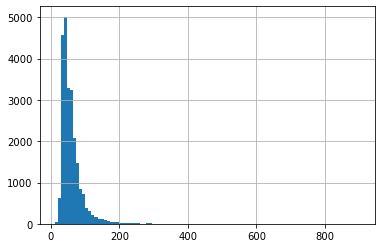

In [77]:
df['total_area'].hist(bins=100) # construction of a histogram for the total area of apartments

Initially, we can conclude that approximately up to 200 sq.m. the data distribution is close to normal, but there are outliers with large values, let's study them.

In [78]:
df['total_area'].describe() # displaying of characteristic values from data

count    23691.000000
mean        60.346202
std         35.658589
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

The minimum area of the apartment is 12 sq.m., the maximum area is 900 sq.m., the average value is 60.34 sq.m., the median value is 52 sq.m.

Let's build a histogram of the maximum values.

<AxesSubplot:>

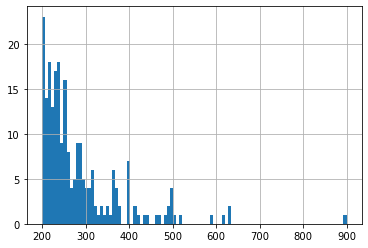

In [79]:
df['total_area'].hist(bins=100, 
                      range=(200, 900)) # construction of a histogram of the total area 
# of large apartments in the range from 200 to 900 sq.m.

Let's build a boxplot diagram.

(0.0, 200.0)

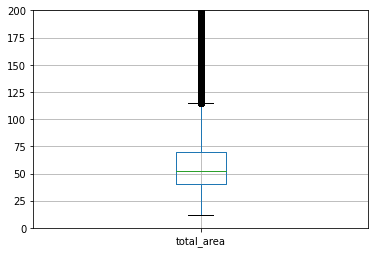

In [80]:
df.boxplot(column='total_area') # boxplot charting
plt.ylim(0, 200) # rescaling the vertical axis

Let us clarify that approximately up to 115 sq.m. data distribution is close to normal, over 115 sq.m. there are outliers in the table.

We looked at the characteristic values for the total area data, noticed that the table contains apartments with very large areas and noted apartments with small areas (12 sq.m.). The largest number of apartments for sale with a total area of 52 sq.m.

Let's study the `last_price`.

<AxesSubplot:>

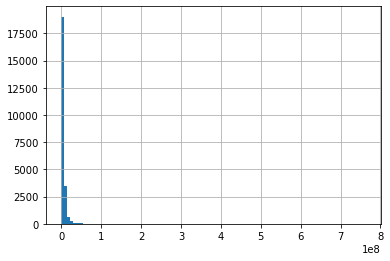

In [81]:
df['last_price'].hist(bins=100) # construction of a histogram for the cost of apartments

The histogram turned out to be uninformative. Let us derive the characteristic values according to the cost of apartments.

In [82]:
df['last_price'].describe() # displaying of characteristic values from data

count    2.369100e+04
mean     6.542278e+06
std      1.088874e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

The minimum cost of an apartment is 121.9 thousand, the maximum is 7.63 billion, the average value is 6.54 million, the median is 4.65 million. There are very expensive objects, the value of the standard deviation is abnormally high. Let's look first at the range from 0 to 20 million, from 20 million to 1 billion, then from 1 billion and up.

<AxesSubplot:>

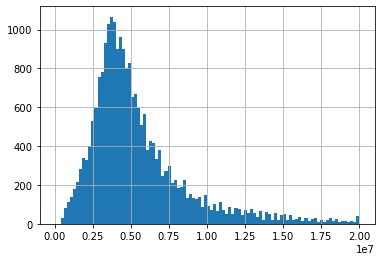

In [83]:
df['last_price'].hist(bins=100, 
                      range=(0, 20000000)) # construction of a histogram for the cost of apartments
# in the range from 0 to 20 million rubles.

<AxesSubplot:>

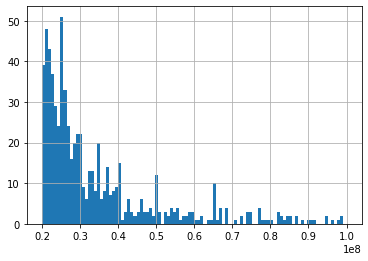

In [84]:
df['last_price'].hist(bins=100, 
                      range=(20000000, 100000000)) # construction of a histogram for the cost of apartments 
# in the range from 20 million to 1 billion.

<AxesSubplot:>

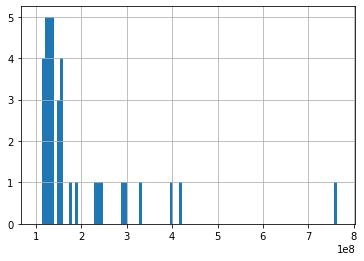

In [85]:
df['last_price'].hist(bins=100, 
                      range=(100000000, 770000000)) # construction of a histogram of the cost of apartments 
# in the range from 1 billion to 7.7 billion.

Let's build a boxplot diagram.

(0.0, 12500000.0)

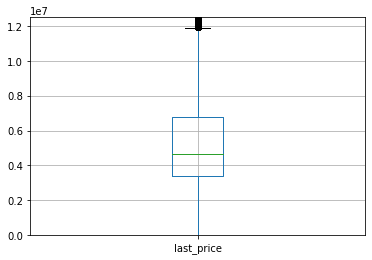

In [86]:
df.boxplot(column='last_price') # boxplot charting
plt.ylim(0, 12500000) # rescaling the vertical axis

Analysis of the data showed that the largest number of apartments are sold for a price of 4.65 million and that the distribution of data by value has, after a cost of approximately 1.2 billion, a strong overshoot towards anomalously high values.

Let's study number of `rooms`.

<AxesSubplot:>

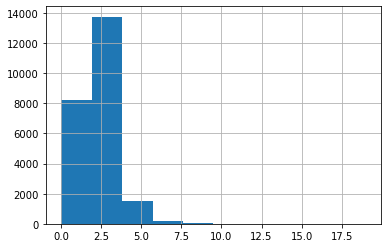

In [87]:
df['rooms'].hist() # construction of a histogram for the cost of apartments

Let us derive the characteristic values of the distribution.

In [88]:
df['rooms'].describe() # displaying of characteristic values from data

count    23691.000000
mean         2.073108
std          1.074855
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

The minimum number of rooms is 1, the maximum is 19, the average is 2.07, the median is 2.

Let's look at histograms in the range from 0 to 10 rooms and from 10 and above, and also build a boxplot chart.

<AxesSubplot:>

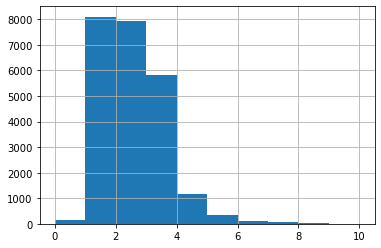

In [89]:
df['rooms'].hist(range=(0, 10)) # building a histogram by the number of rooms in the range from 0 to 10

<AxesSubplot:>

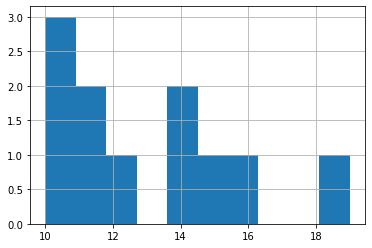

In [90]:
df['rooms'].hist(range=(10, 19)) # building a histogram by the number of rooms in the range of 10 to 19

<AxesSubplot:>

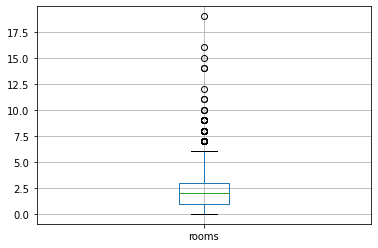

In [91]:
df.boxplot(column='rooms') # boxplot charting

Data analysis showed that the largest number of apartments for sale has a number of rooms of 2. We also have champions with more than 10 rooms. There are outliers from 6 rooms.

Let's study the `ceiling_height`.

<AxesSubplot:>

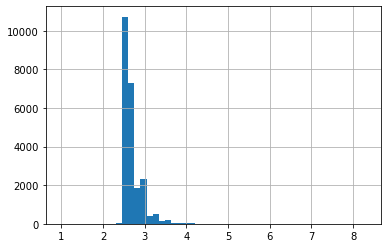

In [92]:
df['ceiling_height'].hist(bins=50) # building a histogram by ceiling height

Let us derive the characteristic values of the distribution.

In [93]:
df['ceiling_height'].describe() # displaying of characteristic values from data

count    23691.000000
mean         2.708861
std          0.245626
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

The minimum ceiling height is 1 m, the maximum is 8.3 m, the average value is 2.7 m, the median is 2.65 m.

Let's build a boxplot diagram.

(2.0, 4.0)

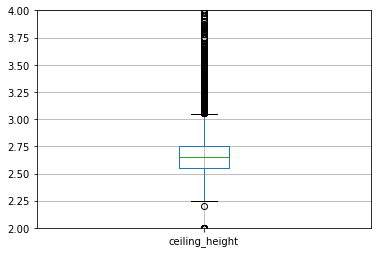

In [94]:
df.boxplot(column='ceiling_height') # boxplot charting
plt.ylim(2, 4) # rescaling the vertical axis

Data analysis showed that the largest number of apartments for sale have a ceiling height of 2.65 m. But there are abnormally low values in the range from 1 to 2.5 m (the minimum ceiling height in residential premises according to building codes), there are also apartments with high ceilings. There are also emissions below 2.25 m and above 3.05 m.

### Studying the time of sale of apartments

Let's start studying the time of sale of apartments. To begin with, let's display the custom values for the `days_exposition` column and build a histogram.

In [95]:
df['days_exposition'].describe() # displaying of characteristic values from data

count    20511.000000
mean       180.909561
std        219.759659
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

The minimum sale value is 1 day, the maximum is 1580 days, the average is 180.91 days, the median is 95 days.

Let's build a histogram.

<AxesSubplot:>

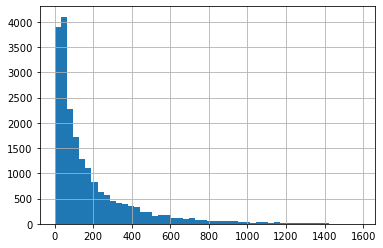

In [96]:
df['days_exposition'].hist(bins=50) # construction of a histogram of the time of sale of apartments

In [97]:
print('The average time to sell an apartment is:', round(df['days_exposition'].mean(), 2), 'days')
print('The median value of the time of sale of the apartment is:', df['days_exposition'].median(), 'days')

The average time to sell an apartment is: 180.91 days
The median value of the time of sale of the apartment is: 95.0 days


It usually takes 95 days to sell an apartment (the median characterizes this value well). We can say that the sale went quickly if the time of the sale took from 1 to 180 days. Unusually long sale times of 180 days or more.

However, there are flats with unusually long exposure times. The maximum sale time is 1580 days, which is 4 years and almost 4 months. Here it is worth remembering that there are gaps in the initial dataframe by the time of sale, and we agreed to consider that these apartments are not sold.

(0.0, 600.0)

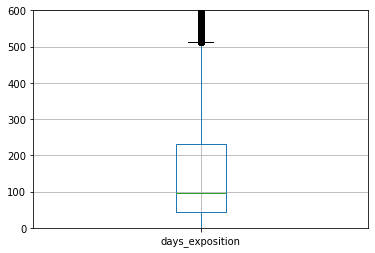

In [98]:
df.boxplot(column='days_exposition') # boxplot charting
plt.ylim(0, 600) # rescaling the vertical axis

We derive the characteristic values of the sample, in which there will be only normal values, without outliers. Emissions start at an estimated value of 510 days.

In [99]:
df.loc[(df['days_exposition'] <= 510), 'days_exposition'].describe() # displaying of characteristic sample values

count    18832.000000
mean       128.554057
std        121.259680
min          1.000000
25%         41.000000
50%         85.000000
75%        182.000000
max        510.000000
Name: days_exposition, dtype: float64

We can notice that the characteristic values in the sample have changed downwards:

The median was 95 days, became 85 days.

The average was 180.91 days, became 128.55 days

Standard deviation was 219.76 days, became 121.26 days.

### Studying of factors affecting the cost of apartments

we study the dependence of the cost of an apartment on other parameters: total area, number of rooms, distance from the center. To do this, we will form an auxiliary dataframe `ddf` with the columns we need and build a matrix of scatterplots.

array([[<AxesSubplot:xlabel='last_price', ylabel='last_price'>,
        <AxesSubplot:xlabel='total_area', ylabel='last_price'>,
        <AxesSubplot:xlabel='rooms', ylabel='last_price'>,
        <AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>],
       [<AxesSubplot:xlabel='last_price', ylabel='total_area'>,
        <AxesSubplot:xlabel='total_area', ylabel='total_area'>,
        <AxesSubplot:xlabel='rooms', ylabel='total_area'>,
        <AxesSubplot:xlabel='city_center_nearest', ylabel='total_area'>],
       [<AxesSubplot:xlabel='last_price', ylabel='rooms'>,
        <AxesSubplot:xlabel='total_area', ylabel='rooms'>,
        <AxesSubplot:xlabel='rooms', ylabel='rooms'>,
        <AxesSubplot:xlabel='city_center_nearest', ylabel='rooms'>],
       [<AxesSubplot:xlabel='last_price', ylabel='city_center_nearest'>,
        <AxesSubplot:xlabel='total_area', ylabel='city_center_nearest'>,
        <AxesSubplot:xlabel='rooms', ylabel='city_center_nearest'>,
        <AxesSubplot:xl

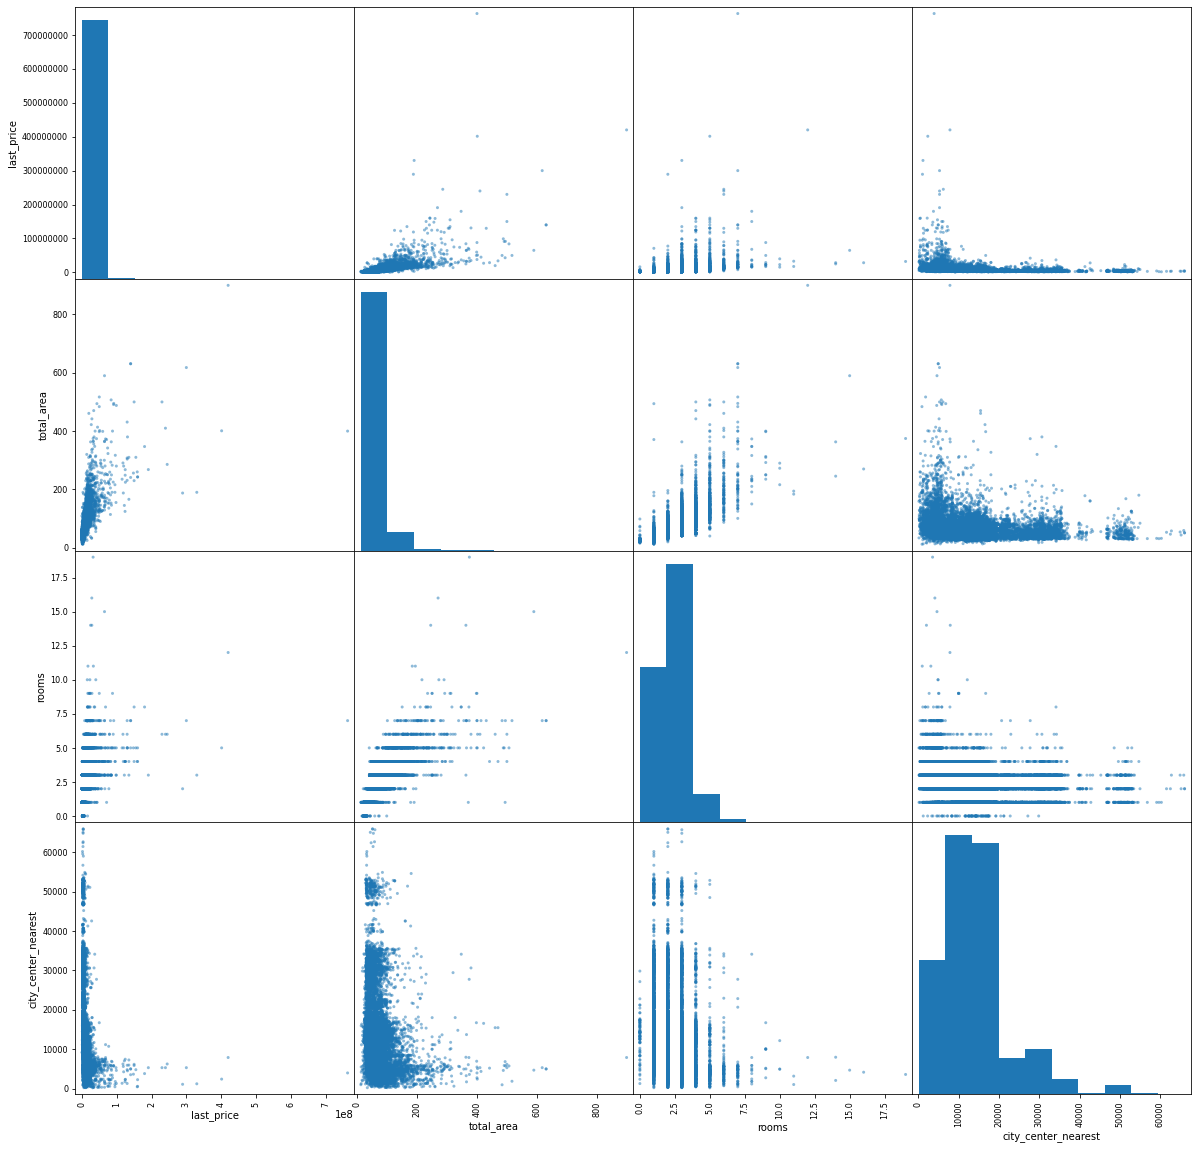

In [100]:
ddf = df[['last_price', 'total_area', 'rooms', 'city_center_nearest']].copy() # formation of an auxiliary dataframe
pd.plotting.scatter_matrix(ddf, figsize=(20, 20)) # construction of a matrix of scatterplots

Preliminarily, we can conclude that there is a dependence of the cost of an apartment on the total area, the number of rooms, and the distance from the center. The cost of apartments grows fairly evenly with an increase in area, however, somewhere after 300 sq.m. a fairly strong spread in cost begins, the dependence is close to linear. The dependence of the cost on the number of rooms is similar to the normal distribution, the most expensive apartments are with 4 and 5 rooms. The dependence of the cost on the distance from the center is quite heterogeneous, there is a large group of expensive apartments located quite close to the center, but still the cost of most apartments does not strongly depend on the distance. More precisely, the relationship of data can be shown to us by correlation coefficients.

In [101]:
ddf.corr() # output of correlation coefficients

,last_price,total_area,rooms,city_center_nearest
last_price,1.000000,0.653709,0.364044,-0.206711
total_area,0.653709,1.000000,0.759125,-0.231378
rooms,0.364044,0.759125,1.000000,-0.185300
city_center_nearest,-0.206711,-0.231378,-0.185300,1.000000


The values of the correlation coefficients in the first column show that there is no tangible relationship between the indicators. This may mean that sellers set prices for apartments based on other factors.

We will study the dependence of the cost of an apartment on the floor. To do this, we group the dataframe by the `floor_type` column with median cost values.

In [102]:
df.groupby('floor_type')['last_price'].median() # grouping dataframe by column 'floor_type'

floor_type
другой       4850000.0
первый       3900000.0
последний    4350000.0
Name: last_price, dtype: float64

According to the results of the grouping, it can be seen that apartments located not on the first and not on the top floor have the highest cost, apartments on the first floor are traditionally the cheapest.

We will study the dependence of the cost of an apartment on the date of placement of the ad. To do this, we group the dataframe by the `weekday_exposition` column with median cost values.

In [103]:
df.groupby('weekday_exposition')['last_price'].median() # grouping dataframe by 'weekday_exposition' column

weekday_exposition
0    4650000.0
1    4730000.0
2    4700000.0
3    4650000.0
4    4585000.0
5    4560000.0
6    4550000.0
Name: last_price, dtype: float64

The results of the grouping show that the difference in the cost of apartments located on different days of the week is insignificant. More expensive apartments are placed on Tuesdays and Wednesdays. Announcements with cheap apartments are placed on weekends.

In [104]:
df.groupby('month_exposition')['last_price'].median() # grouping dataframe by 'month_exposition' column

month_exposition
1     4600000.0
2     4650000.0
3     4650000.0
4     4800000.0
5     4500000.0
6     4400000.0
7     4650000.0
8     4570000.0
9     4700000.0
10    4570000.0
11    4700000.0
12    4700000.0
Name: last_price, dtype: float64

According to the grouping results, it is clear that the difference in the cost of apartments located in different months is also insignificant. More expensive apartments are placed in April, September, November and December. Announcements with cheap apartments are placed in May and January.

In [105]:
df.groupby('year_exposition')['last_price'].median() # grouping dataframe by 'year_exposition' column

year_exposition
2014    7700000.0
2015    5350000.0
2016    4550000.0
2017    4500000.0
2018    4550000.0
2019    5050000.0
Name: last_price, dtype: float64

According to the results of the grouping, it can be seen that the peak of the placement of expensive apartments occurred in 2014. Ads with cheap apartments were posted in 2016-2018.

Based on the results of the study, it can be concluded that the cost of apartments significantly depends on the type of floor. With other parameters (total area, number of rooms, distance from the center, date of placement of the ad), not everything is so simple. This shows that the real estate market is quite lively and offers can be very diverse, regardless of the specific parameters of the object. In practice, at least such parameters as a specific area of ​​location, the age of the house, the type of house, and the presence of repairs are taken into account.

### Studying the 10 locations with the most ads

Let's try to identify 10 settlements with the largest number of ads.

In [106]:
df['locality_name'].value_counts().head(10) # output of 10 settlements with the largest number of ads

Санкт-Петербург      15759
поселок Мурино         556
поселок Шушары         440
Всеволожск             398
Пушкин                 371
Колпино                338
поселок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Name: locality_name, dtype: int64

We got the top 10 locations with the most ads. As expected, St. Petersburg topped the list.

Let's calculate the average price per square meter in these settlements. To do this, we will create a table

In [107]:
(df.pivot_table(index='locality_name', aggfunc={'locality_name': len, 'sq_m_price': np.mean,}) # table formation
 .rename(columns={'locality_name':'count', 'sq_m_price':'mean_sq_m_price'}) # renaming columns
 .sort_values('count', ascending=False) # sort values in descending order
 .round(2) # rounding
 .head(10)) # display the first 10 lines

,count,mean_sq_m_price
locality_name,,
Санкт-Петербург,15759,114817.71
поселок Мурино,556,85681.76
поселок Шушары,440,78677.36
Всеволожск,398,68654.47
Пушкин,371,102915.06
Колпино,338,75424.58
поселок Парголово,327,90175.91
Гатчина,307,68746.15
деревня Кудрово,299,92473.55


Let's determine the location of the most expensive and cheapest apartment.

In [108]:
df.loc[df['last_price'] == df['last_price'].max(), 'locality_name'] # determining the location of the most expensive apartment

12970    Санкт-Петербург
Name: locality_name, dtype: object

In [109]:
df.loc[df['last_price'] == df['last_price'].min(), 'locality_name'] # determining the location of the cheapest apartment

8792    Санкт-Петербург
Name: locality_name, dtype: object

<div class="alert alert-block alert-info">
<b>Note:</b>
    
    The 'locality_name' column shows the locality name in Russian:
    
    * Санкт-Петербург - St. Petersburg
</div>

Both apartments are located in St. Petersburg.

### Studying the dependence of the cost of an apartment on the factor of distance from the center

We will study the dependence of the average cost of an apartment in St. Petersburg on the distance from the center. To begin with, let's add a `c_c_km` column to the original dataframe with information about the distance to the city center.

In [110]:
df['c_c_km'] = round(df.loc[df['locality_name'] == 'Санкт-Петербург',
                            'city_center_nearest'] / 1000) # adding a column to a dataframe
df.head() # check

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,is_studio,is_open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around_3km,parks_nearest,ponds_around_3km,ponds_nearest,days_exposition,sq_m_price,weekday_exposition,month_exposition,year_exposition,floor_type,living_ratio,kitchen_ratio,c_c_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой,0.47,0.23,16.0
1,7,3350000.0,40.4,2018-12-04,1,2.75,11,18.6,1,False,False,False,11.0,2,поселок Шушары,12817.0,18603.0,0.0,0.0,0.0,0.0,81.0,82920.79,1,12,2018,первый,0.46,0.27,NaN
2,10,5196000.0,56.0,2015-08-20,2,2.55,5,34.3,4,False,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой,0.61,0.15,14.0
3,0,64900000.0,159.0,2015-07-24,3,2.60,14,45.0,9,False,False,False,9.5,0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой,0.28,0.06,7.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.0,13,False,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой,0.32,0.41,8.0


Let's form an auxiliary dataframe `kmf` from the pivot table of the original dataframe and plot the dependence of the average cost of an apartment on the distance from the city center.

In [111]:
kmf = (df.loc[df['locality_name'] == 'Санкт-Петербург'] # formation of an auxiliary dataframe
       .pivot_table(index='c_c_km', aggfunc={'sq_m_price': np.mean,}) # formation of a pivot table
       .rename(columns={'sq_m_price':'mean_sq_m_price'}) # renaming columns
       .round(2)) # rounding

<AxesSubplot:xlabel='city_center_distance_in_km'>

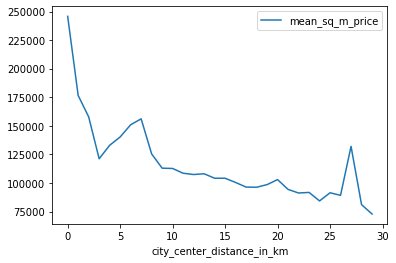

In [112]:
kmf.plot(xlabel='city_center_distance_in_km') # plotting

Let's build a graph in the range from 0 to 10 km.

<AxesSubplot:xlabel='city_center_distance_in_km'>

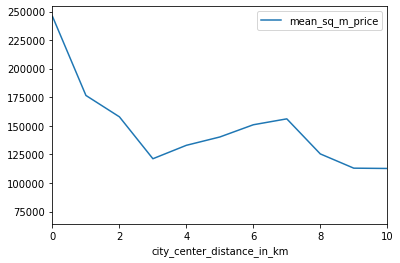

In [113]:
kmf.plot(xlabel='city_center_distance_in_km', xlim=(0, 10)) # plotting

The graph of the dependence of the cost on the distance from the city center has a characteristic feature. The values \u200b\u200bare almost uniformly falling to a value of 3 km, but there is still a peak at 7 km. It can be concluded that the 'city center' has a radius of 7 km.

We will study the characteristic features and relationships. To begin with, we will study the `total_area`, build a histogram, a range diagram and display the characteristic values for the sample and for the entire dataframe.

<AxesSubplot:>

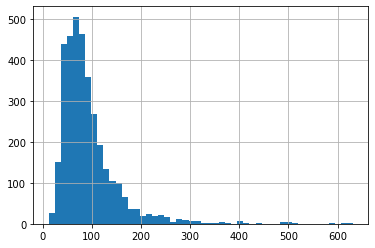

In [114]:
df.query('c_c_km > 0 and c_c_km <= 7')['total_area'].hist(bins=50) # construction of a histogram of the area of apartments

(0.0, 200.0)

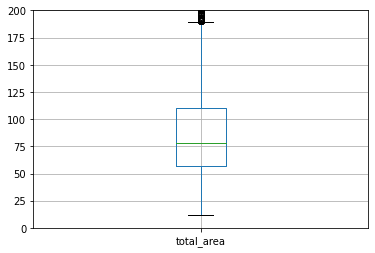

In [115]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='total_area') # boxplot charting
plt.ylim(0, 200) # rescaling the vertical axis

In [116]:
df.query('c_c_km > 0 and c_c_km <= 7')['total_area'].describe() # output of characteristic sample values for the city center

count    3514.000000
mean       92.945435
std        59.379594
min        12.000000
25%        56.900000
50%        78.400000
75%       110.000000
max       631.200000
Name: total_area, dtype: float64

In [117]:
df['total_area'].describe() # output of characteristic sample values throughout the dataframe

count    23691.000000
mean        60.346202
std         35.658589
min         12.000000
25%         40.000000
50%         52.000000
75%         69.800000
max        900.000000
Name: total_area, dtype: float64

The minimum value of the area is 12 sq.m., the maximum is 631.2 sq.m., the average value is 92.95 sq.m., the median is 78.4 sq.m. The standard deviation has a fairly large value, which indicates that there are outliers in the data distribution, starting from a value of 190 sq.m. In this particular case, this means that apartments with a large area are quite common in the city center, the average area of apartments in the center is larger, the smallest apartment is also located in the center.

Let's study the `last_price`.

<AxesSubplot:>

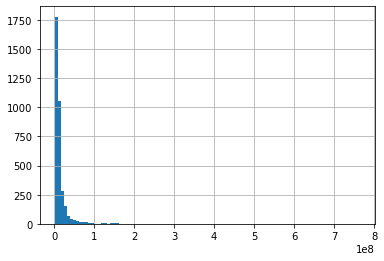

In [118]:
df.query('c_c_km > 0 and c_c_km <= 7')['last_price'].hist(bins=100) # construction of a histogram of the cost of apartments

We see that the distribution has a fairly strong outlier towards large values. Let's build a range chart and display characteristic values for the sample and for the entire dataframe.

(0.0, 30000000.0)

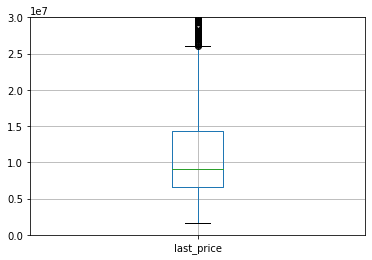

In [119]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='last_price') # boxplot charting
plt.ylim(0, 30000000) # rescaling the vertical axis

In [120]:
df.query('c_c_km > 0 and c_c_km <= 7')['last_price'].describe() # output of characteristic values in the city center

count    3.514000e+03
mean     1.474474e+07
std      2.414781e+07
min      1.600000e+06
25%      6.650000e+06
50%      9.160000e+06
75%      1.440000e+07
max      7.630000e+08
Name: last_price, dtype: float64

In [121]:
df['last_price'].describe() # output of characteristic sample values throughout the dataframe

count    2.369100e+04
mean     6.542278e+06
std      1.088874e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

The minimum value of the cost is 1.6 million, the maximum is 7.63 billion, the average value is 14.74 million, the median is 9.16 million. In a specific case, this means that apartments with high prices are quite common in the city center, the average cost of apartments in the center is much higher.

Let's study number of `rooms`.

<AxesSubplot:>

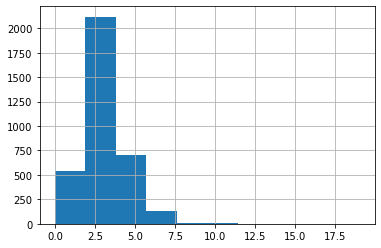

In [122]:
df.query('c_c_km > 0 and c_c_km <= 7')['rooms'].hist() # building a histogram of the number of rooms

There are small outliers towards large values. Let's build a range chart and display characteristic values for the sample and for the entire dataframe.

<AxesSubplot:>

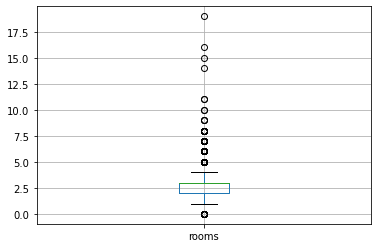

In [123]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='rooms') # boxplot charting

In [124]:
df.query('c_c_km > 0 and c_c_km <= 7')['rooms'].describe() # output of characteristic values in the city center

count    3514.000000
mean        2.834092
std         1.446284
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

In [125]:
df['rooms'].describe() # output of characteristic sample values throughout the dataframe

count    23691.000000
mean         2.073108
std          1.074855
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

The minimum value of the number of rooms is 0, the maximum is 19, the average value is 2.8, the median is 3. The standard deviation is small, which indicates that the distribution of the data is close to normal. The average number of rooms in the city center is higher; 2- and 3-room apartments are more common. The apartment with the most rooms is located in the city center.

Let's study the `ceiling_height`.

<AxesSubplot:>

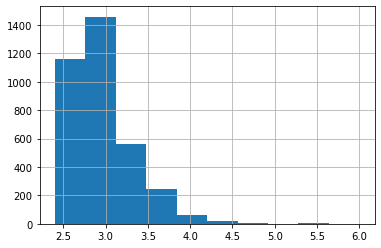

In [126]:
df.query('c_c_km > 0 and c_c_km <= 7')['ceiling_height'].hist() # building a histogram of ceiling heights

There are small outliers towards large values. Let's build a range chart and display characteristic values for the sample and for the entire dataframe.

<AxesSubplot:>

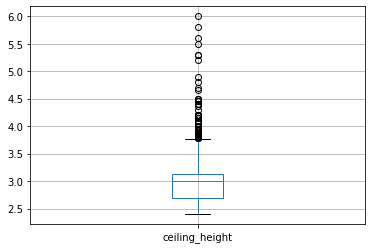

In [127]:
df.query('c_c_km > 0 and c_c_km <= 7').boxplot(column='ceiling_height') # boxplot charting
#plt.ylim(0, 30000000) # rescaling the vertical axis

In [128]:
df.query('c_c_km > 0 and c_c_km <= 7')['ceiling_height'].describe() # output of characteristic values in the city center

count    3514.000000
mean        2.973196
std         0.363487
min         2.400000
25%         2.700000
50%         3.000000
75%         3.130000
max         6.000000
Name: ceiling_height, dtype: float64

In [129]:
df['ceiling_height'].describe() # output of characteristic sample values throughout the dataframe

count    23691.000000
mean         2.708861
std          0.245626
min          1.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.300000
Name: ceiling_height, dtype: float64

The minimum value of the ceiling height is 2.4 m, the maximum is 6, the average value is 2.97, the median is 3. The standard deviation has a small value, which indicates that the distribution of the data is close to normal. The average ceiling height in the city center is higher, apartments with high ceilings are more common.

Let's highlight the factors that affect the cost of apartments in the center. First, let's look at the dependence of the cost on the number of rooms. Let's group a slice of the original dataframe by the number of rooms with a median cost of apartments and build a graph.

<AxesSubplot:xlabel='rooms'>

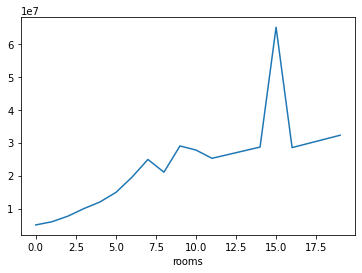

In [130]:
(df.query('c_c_km > 0 and c_c_km <= 7') 
 .groupby('rooms')['last_price'] # grouping the query by the number of rooms
 .median() # calculation of median values
 .plot()) # plotting

We see that the cost of apartments in the city center increases depending on the number of rooms, however, there are jumps in the cost of 6 and 9-room apartments, as well as a sharp jump in the cost of 15-room apartments.

Let's start studying the dependence of the cost of apartments in the city center on the type of floor. Let's group the slice of the original dataframe by the type of floor with the median cost of apartments.

In [131]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('floor_type')['last_price'].median() # grouping query by floor type

floor_type
другой       9530000.0
первый       6649500.0
последний    9350000.0
Name: last_price, dtype: float64

The cheapest apartments in the center are traditionally located on the ground floor. The most expensive are not on the first and not on the last floor. This is no different from data across the entire dataframe.

We will study the dependence of the cost of apartments on the distance to the city center. Let's build a scatterplot.

<AxesSubplot:xlabel='city_center_nearest', ylabel='last_price'>

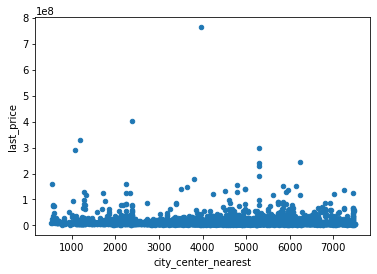

In [132]:
df.query('c_c_km > 0 and c_c_km <= 7').plot(x='city_center_nearest',
                                            y='last_price', kind='scatter') # building a scatterplot

A clear relationship between the cost of apartments and the distance from the center in the city center is not traced, there are expensive objects, as well as close to the center, and at a distance from it.

Let's look at the relationship of cost from the date of placement of the ad. Let's group the dataframe slice by day of the week, month and year of placement with a median cost.

In [133]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('weekday_exposition')['last_price'].median() # slice grouping
# by day of the week of posting

weekday_exposition
0    9300000.0
1    9000000.0
2    9370000.0
3    9300000.0
4    9000000.0
5    8594500.0
6    9400000.0
Name: last_price, dtype: float64

In [134]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('month_exposition')['last_price'].median() # slice grouping
# by month of placement

month_exposition
1     9900000.0
2     9500000.0
3     9400000.0
4     9000000.0
5     8900000.0
6     8820000.0
7     9200000.0
8     8970000.0
9     9525760.0
10    8700000.0
11    9500000.0
12    8510000.0
Name: last_price, dtype: float64

In [135]:
df.query('c_c_km > 0 and c_c_km <= 7').groupby('year_exposition')['last_price'].median() # grouping the slice 
# by year of placement

year_exposition
2014    18345000.0
2015    10090000.0
2016     9495000.0
2017     9000000.0
2018     8800000.0
2019     9400000.0
Name: last_price, dtype: float64

You can see that the most expensive apartments are placed on Wednesday, Sunday, January, September, in 2014 and 2015. The cheapest on Saturday, in October, December, in 2018.

### Conclusion

After examining the data, we found interesting patterns. Data on areas and prices of apartments are characterized by outliers in the direction of large values. That is, very large and very expensive apartments are often found on sale. The ceiling height and the number of rooms are characterized by normal data distributions, which means that most ads are with average values ​​(these are 2.3-room apartments and a ceiling height of 2.7-2.75 m.). We looked at the time of sale of apartments, determined the characteristic values. We found out that some of the ads are exhibited for a long time (some apartments are on sale for 3-4 years), the bulk of the apartments are sold within 3 months.

## General conclusion

The main objective of the study was to study the residential real estate market in St. Petersburg. Having studied the data, we identified anomalies in them, filled in the gaps if possible. The study identified the main factors influencing the cost of apartments. The cost of apartments is growing fairly evenly with the increase in area. Most expensive apartments are with 4 and 5 rooms. The dependence of the cost on the distance from the center is quite heterogeneous, there is a large group of expensive apartments located quite close to the center, but still the cost of most apartments does not strongly depend on the distance. The days of the week, months and years in which the ads with the highest cost were published were determined. Also in the course of the study, the top 10 settlements with the largest number of ads were identified, the location of the most expensive and cheapest apartment was determined. In addition, an analysis was carried out to determine the district of the city center and the main indicators were studied. Conclusions are drawn on the main parameters and differences from the entire sample are determined.